In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
import glob

In [4]:
files = glob.glob('/home/pmcroot/c2/var/lib/collectd/csv/pmc-camera-2.unassigned-domain/*/temperature*2017-02-1[6789]*')

In [5]:
len(files)

76

In [6]:
import os

In [8]:
import seaborn as sns
sns.set_context('poster')
sns.set(font_scale=2)
from cycler import cycler

/home/gjones/anaconda/envs/pmc/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [9]:
import time

In [10]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


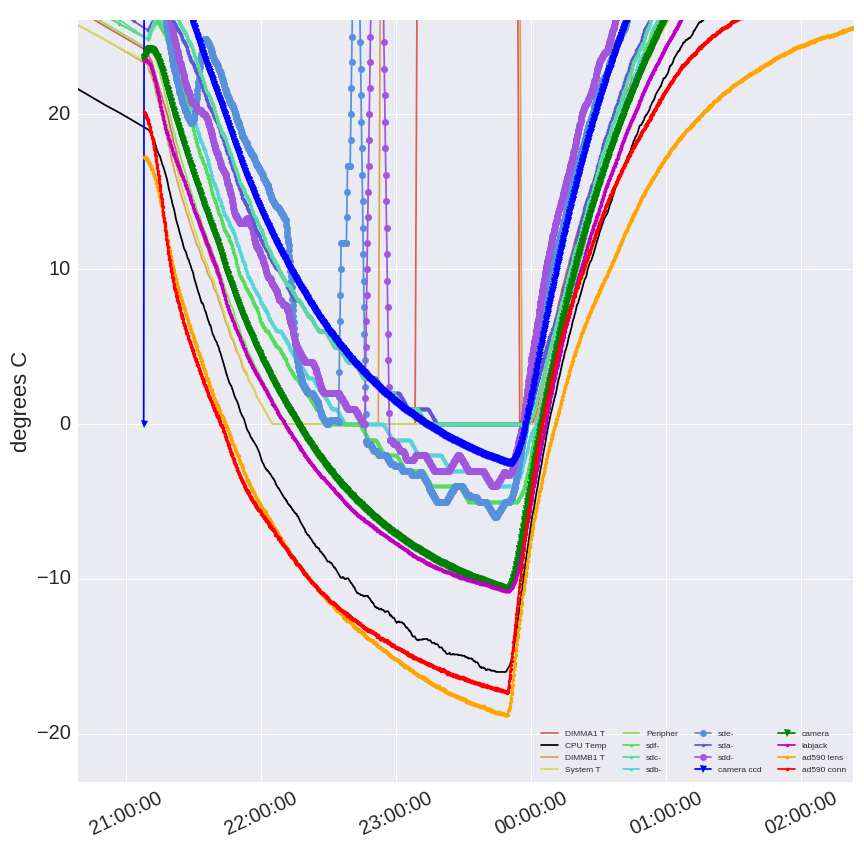

0 DIMMA1 T
1 DIMMB1 T
2 System T
3 Peripher
4 sdf-
5 sdc-
6 sdb-
7 sde-
8 sda-
9 sdd-
Mon Feb 20 11:19:36 2017


In [13]:
avgsamp = 24
palette = sns.hls_palette(n_colors=12)
fig,ax = subplots(1,1,figsize=(12,12))
cdict = {}
cindex = 0
since = 0#time.time()-5*3600
cpu_label = 'CPU Temp'
for fn in files:
    df = pd.read_csv(fn,comment='#')
    if df.epoch.max() < since:
        continue
    mask = df.value > 200
    df['corrected_value'] = np.where(mask,df.value-255,df.value)
    #df['date'] = pd.to_datetime(df.epoch,unit='s')
    marker=''
    label = os.path.split(fn)[1].replace('temperature-','')[:8]
    date_idx = label.find('20')
    if date_idx >= 0:
        label = label[:date_idx]
    for s in ['sda','sdb', 'sdc','sdf']:
        if s in fn:
            marker = '.'
    for s in ['sdd','sde']:
        if s in fn:
            marker = 'o'
    if 'core' in fn:
        continue
    if 'core' in fn or 'CPU' in fn:
        ax.plot(pd.to_datetime(df.epoch.rolling(avgsamp).mean(),unit='s'),df.value.rolling(avgsamp).mean(),label=cpu_label,
               color='k')
        cpu_label = ''
    else:    
        try:
            color = cdict[label]
            label = None
        except KeyError:
            color = palette[cindex]
            cdict[label] = color
            print cindex,label
            cindex += 1
        ax.plot(pd.to_datetime(df.epoch.rolling(avgsamp).mean(),unit='s'),df.corrected_value.rolling(avgsamp).mean().values,label=label, color=color,
               marker=marker)
ccd_label = 'camera ccd'
main_label = 'camera'
cfiles = glob.glob('/home/pmcroot/c2/home/pmc/logs/housekeeping/camera/2017-02*.csv')
cfiles.sort()
for fn in cfiles:
    try:
        df = pd.read_csv(fn,comment='#')
    except ValueError:
        print "empty file",fn
        continue
    if df.epoch.max() < since:
        continue
    df['date'] = pd.to_datetime(df.epoch,unit='s')
    ax.plot(df.date,df.sensor_temperature,label=ccd_label,marker='v',color='b')
    ax.plot(df.date,df.main_temperature,label=main_label,marker='v',color='g')
    main_label = ''
    ccd_label = ''
    
lfiles = glob.glob('/home/pmcroot/c2/home/pmc/logs/housekeeping/labjack/2017-02*.csv')
lfiles.sort()
lj_label = 'labjack'
ad1_label = 'ad590 lens'
ad2_label = 'ad590 conn'
for fn in lfiles:
    df = pd.read_csv(fn,comment='#')
    if df.epoch.max() < since:
        continue
    df['date'] = pd.to_datetime(df.epoch,unit='s')
    ax.plot(df.date,df.temperature-273,label=lj_label,marker='.',color='m')
    ax.plot(df.date,df.ain6*1000-273,label=ad1_label,marker='.',color='orange')
    dd = df[df.ain5*1000-273 <100]
    ax.plot(dd.date,dd.ain5*1000-273,label=ad2_label,marker='.',color='red')
    lj_label = ''
    ad1_label = ''
    ad2_label = ''
    
    
ax.legend(loc='lower right',ncol=4,prop=dict(size='small'))
print time.ctime(df.epoch.max())
ax.set_ylabel('degrees C')
#ax.set_xlabel('hours')
plt.xticks(rotation=25)
#ax.xaxis.axis_date()
#ax.xaxis.set_major_formatter(UnixTimeFormatter('%Y-%m-%d %H:%M:%S'))

fig.tight_layout()

<IPython.core.display.Javascript object>


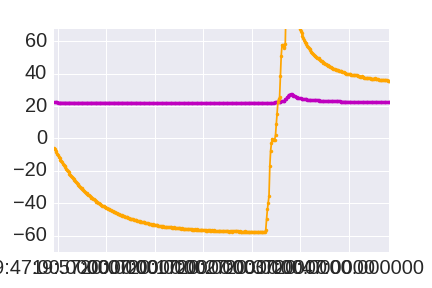

In [12]:
fig,ax = subplots()
lfiles = glob.glob('/home/pmcroot/c0/home/pmc/logs/housekeeping/labjack/2017-02*.csv')
lfiles.sort()
lj_label = 'labjack'
ad1_label = 'ad590 lens'
ad2_label = 'ad590 conn'
for fn in lfiles:
    df = pd.read_csv(fn,comment='#')
    if df.epoch.max() < since:
        continue
    df['date'] = pd.to_datetime(df.epoch,unit='s')
    ax.plot(df.date,df.temperature-273,label=lj_label,marker='.',color='m')
    ax.plot(df.date,df.ain6*1000-273,label=ad1_label,marker='.',color='orange')
    dd = df[df.ain5*1000-273 <100]
    ax.plot(dd.date,dd.ain5*1000-273,label=ad2_label,marker='.',color='red')
    lj_label = ''
    ad1_label = ''
    ad2_label = ''

In [335]:
import pytz

In [336]:
pytz.timezone('US/Eastern')

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

In [ ]:
def plot_date_range(start,end,avgsamp=24,rasterized=True):
    palette = sns.hls_palette(n_colors=12)
    fig,ax = subplots(1,1,figsize=(12,12))
    cdict = {}
    cindex = 0
    cpu_label = 'CPU Temp'
    for fn in files:
        df = pd.read_csv(fn,comment='#')
        df['date'] = pd.to_datetime(df.epoch,unit='s')
        df = df[(df.date > start) & (df.date < end)]
        if len(df) == 0:
            continue
        marker=''
        label = os.path.split(fn)[1].replace('temperature-','')[:8]
        date_idx = label.find('20')
        if date_idx >= 0:
            label = label[:date_idx]
        for s in ['sda','sdb', 'sdc','sdf']:
            if s in fn:
                marker = '.'
                label = label + 'HDD'
        for s in ['sdd','sde']:
            if s in fn:
                marker = 'o'
                label = label + 'SATADOM'
        if 'core' in fn:
            continue
        if 'core' in fn or 'CPU' in fn:
            ax.plot(df.date,df.value.rolling(avgsamp).mean(),label=cpu_label,
                   color='k',rasterized=rasterized)
            cpu_label = ''
        else:    
            try:
                color = cdict[label]
                label = None
            except KeyError:
                color = palette[cindex]
                cdict[label] = color
                print cindex,label
                cindex += 1
            ax.plot(df.date,df.value.rolling(avgsamp).mean().values,label=label, color=color,
                   marker=marker,rasterized=rasterized)
    ccd_label = 'camera ccd'
    main_label = 'camera box'
    cfiles = glob.glob('/home/pmcroot/c2/home/pmc/logs/housekeeping/camera/*.csv')
    cfiles.sort()
    for fn in cfiles:
        df = pd.read_csv(fn,comment='#')
        df['date'] = pd.to_datetime(df.epoch,unit='s')
        df = df[(df.date > start) & (df.date < end)]
        if len(df) == 0:
            continue
        ax.plot(df.date,df.sensor,label=ccd_label,marker='v',color='b',rasterized=rasterized)
        ax.plot(df.date,df.main,label=main_label,marker='v',color='g',rasterized=rasterized)
        main_label = ''
        ccd_label = ''

    lfiles = glob.glob('/home/pmcroot/c2/home/pmc/logs/housekeeping/labjack/*.csv')
    lfiles.sort()
    lj_label = 'labjack'
    ad1_label = 'ad590 lens'
    ad2_label = 'ad590 conn'
    for fn in lfiles:
        df = pd.read_csv(fn,comment='#')
        df['date'] = pd.to_datetime(df.epoch,unit='s')
        df = df[(df.date > start) & (df.date < end)]
        if len(df) == 0:
            continue
        ax.plot(df.date,df.temperature-273,label=lj_label,marker='.',color='m',rasterized=rasterized)
        ax.plot(df.date,df.ain6*1000-273,label=ad1_label,marker='.',color='orange',rasterized=rasterized)
        dd = df[df.ain5*1000-273 <100]
        ax.plot(dd.date,dd.ain5*1000-273,label=ad2_label,marker='.',color='red',rasterized=rasterized)
        lj_label = ''
        ad1_label = ''
        ad2_label = ''


    ax.legend(loc='lower right',ncol=4,prop=dict(size='medium'),framealpha=.7,frameon=True)
    try:
        print time.ctime(df.epoch.max())
    except:
        pass
    ax.set_ylabel('degrees C')
    #ax.set_xlabel('hours')
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H:%M', tz=pytz.timezone('US/Eastern')))
    #plt.xticks(rotation=25)
    fig.autofmt_xdate()
    #ax.xaxis.axis_date()
    #ax.xaxis.set_major_formatter(UnixTimeFormatter('%Y-%m-%d %H:%M:%S'))
    fig.tight_layout()
    return fig,ax

<IPython.core.display.Javascript object>


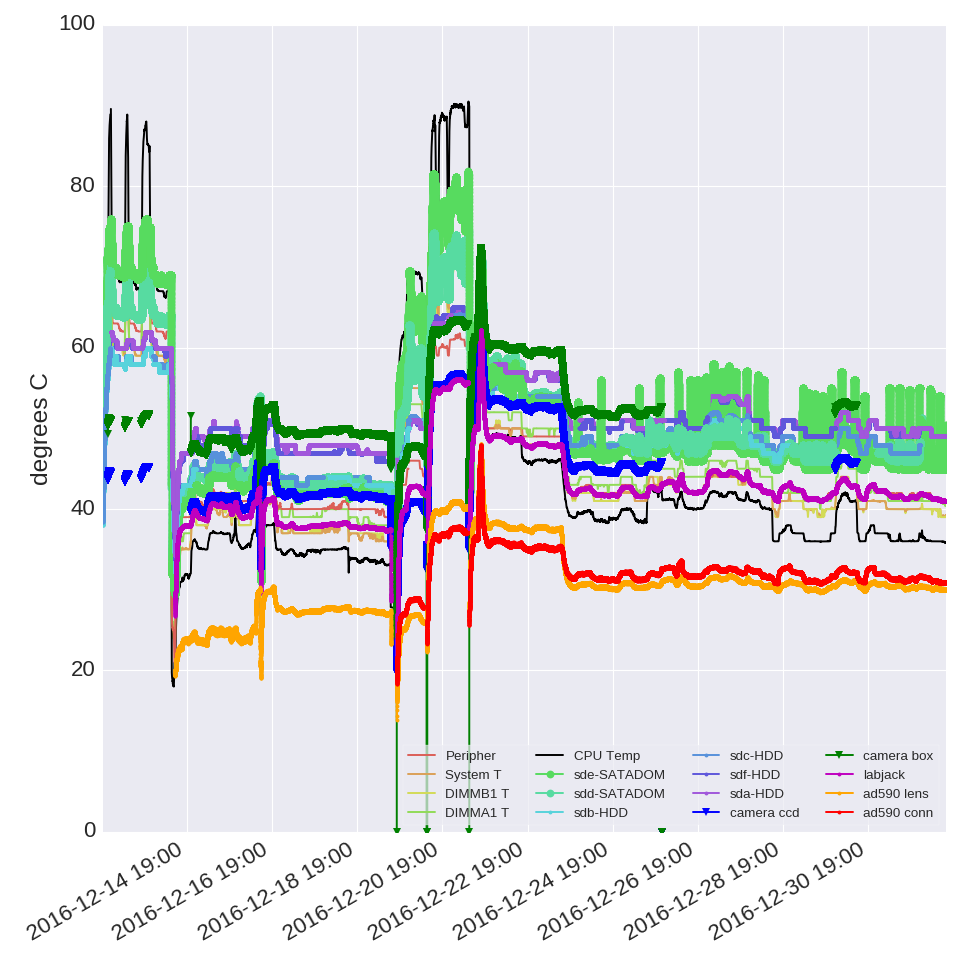

0 Peripher
1 System T
2 DIMMB1 T
3 DIMMA1 T
4 sde-SATADOM
5 sdd-SATADOM
6 sdb-HDD
7 sdc-HDD
8 sdf-HDD
9 sda-HDD
Sun Jan  1 14:30:31 2017


(<matplotlib.figure.Figure at 0x7fd69b8ad710>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd6979b9f10>)

In [351]:
plot_date_range('2016-12-13','2017-12-14 12:00',avgsamp=100)

In [352]:
experiments = [('2016-12-12', '2016-12-14 11:00',"No fans, under AC duct, wall 20-25 C"),
              ('2016-12-14 11:00','2016-12-16 12:00',"Single large fan, under AC duct, lens sensor floating near front"),
              ('2016-12-16 12:00','2016-12-19 13:00',"Single large fan, under AC duct, lens sensor floating near front"),
              ('2016-12-19 13:00','2016-12-20 11:00',"Five 25 mm fans, under AC duct, DC/DC installed"),
              ('2016-12-20 11:00','2016-12-21 08:00',"Five 25 mm fans, over radiator on high, DC/DC installed"),
              ('2016-12-21 12:00','2016-12-23 12:00',"Five 25 mm fans plus large fan, over radiator on high\n Spike from putting winter coat over vessel"),
              ('2016-12-23 12:00','2016-12-30 12:00',"Five 25 mm fans plus large fan, over radiator on low")]

In [353]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [354]:
!mkdir /home/gjones/pmc-thermal-testing

In [355]:
import os

In [359]:
a = ',: /'.replace(', ','_')

In [365]:
pd.Timestamp('2016-12-12',tz=pytz.timezone('US/Eastern'))

Timestamp('2016-12-12 00:00:00-0500', tz='US/Eastern')

0 Peripher
1 DIMMB1 T
2 DIMMA1 T
3 System T
4 sde-SATADOM
5 sdd-SATADOM
6 sda-HDD
7 sdc-HDD
8 sdf-HDD
9 sdb-HDD
0 Peripher
1 System T
2 DIMMA1 T
3 DIMMB1 T
4 sda-HDD
5 sdd-SATADOM
6 sdb-HDD
7 sde-SATADOM
8 sdc-HDD
9 sdf-HDD
0 System T
1 DIMMB1 T
2 Peripher
3 DIMMA1 T
4 sdc-HDD
5 sdf-HDD
6 sdd-SATADOM
7 sdb-HDD
8 sde-SATADOM
9 sda-HDD
0 DIMMA1 T
1 DIMMB1 T
2 Peripher
3 System T
4 sdf-HDD
5 sde-SATADOM
6 sdc-HDD
7 sdd-SATADOM
8 sdb-HDD
9 sda-HDD
0 DIMMA1 T
1 DIMMB1 T
2 System T
3 Peripher
4 sde-SATADOM
5 sdc-HDD
6 sdb-HDD
7 sdd-SATADOM
8 sdf-HDD
9 sda-HDD
0 DIMMA1 T
1 DIMMB1 T
2 System T
3 Peripher
4 sdd-SATADOM
5 sdf-HDD
6 sdc-HDD
7 sdb-HDD
8 sda-HDD
9 sde-SATADOM
Fri Dec 23 11:59:50 2016
0 Peripher
1 System T
2 DIMMB1 T
3 DIMMA1 T
4 sdd-SATADOM
5 sdb-HDD
6 sde-SATADOM
7 sda-HDD
8 sdf-HDD
9 sdc-HDD
Fri Dec 30 11:59:56 2016


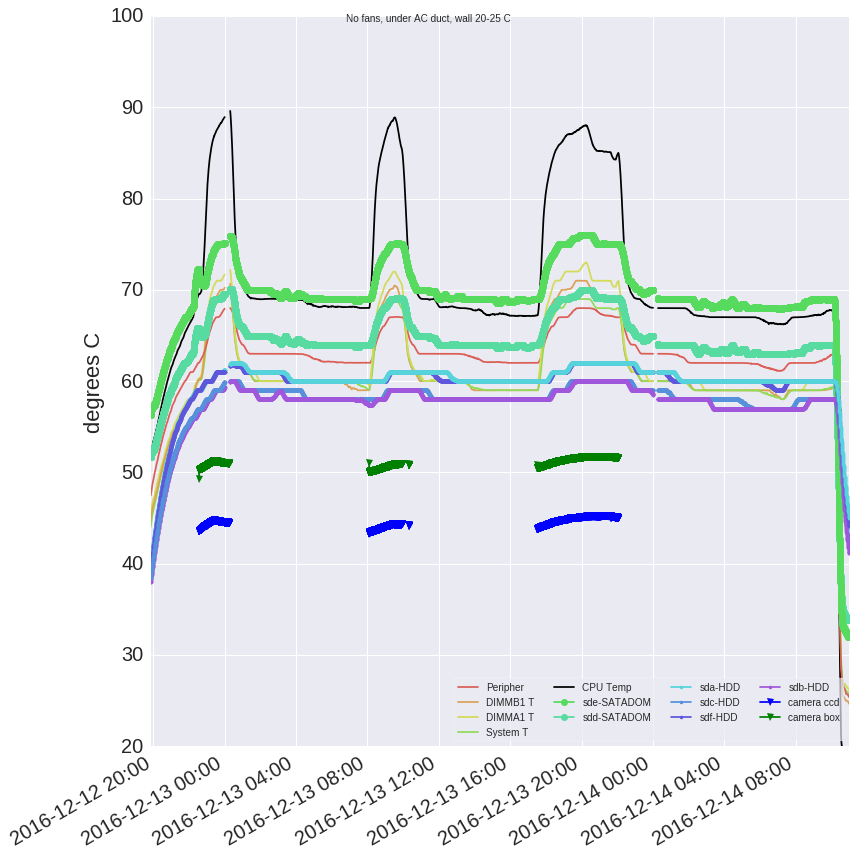

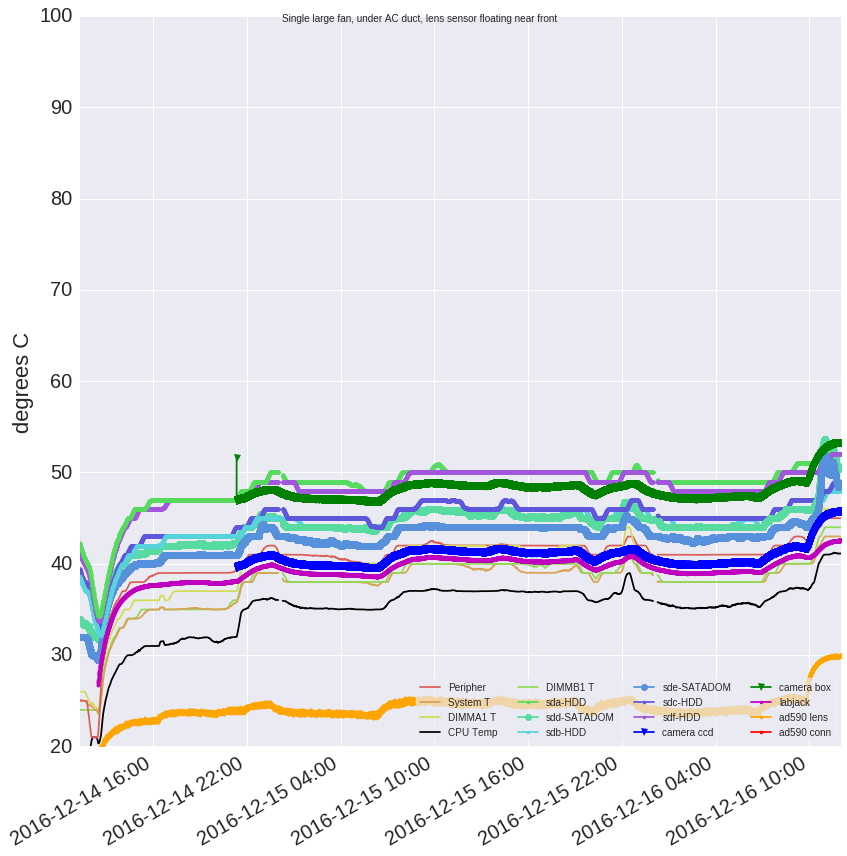

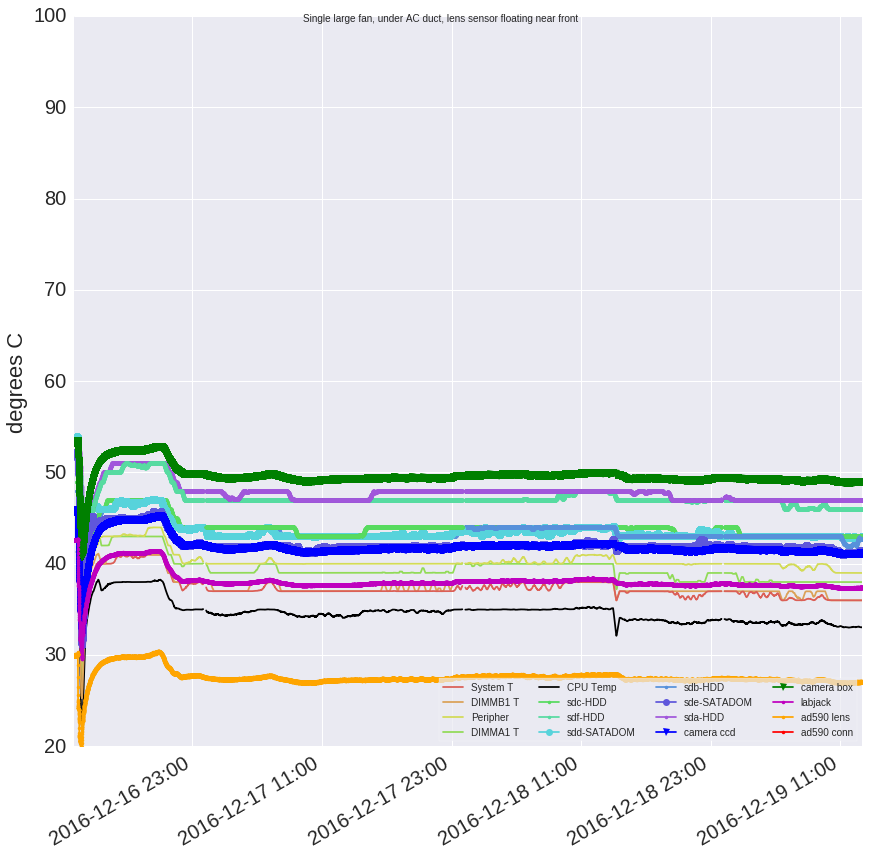

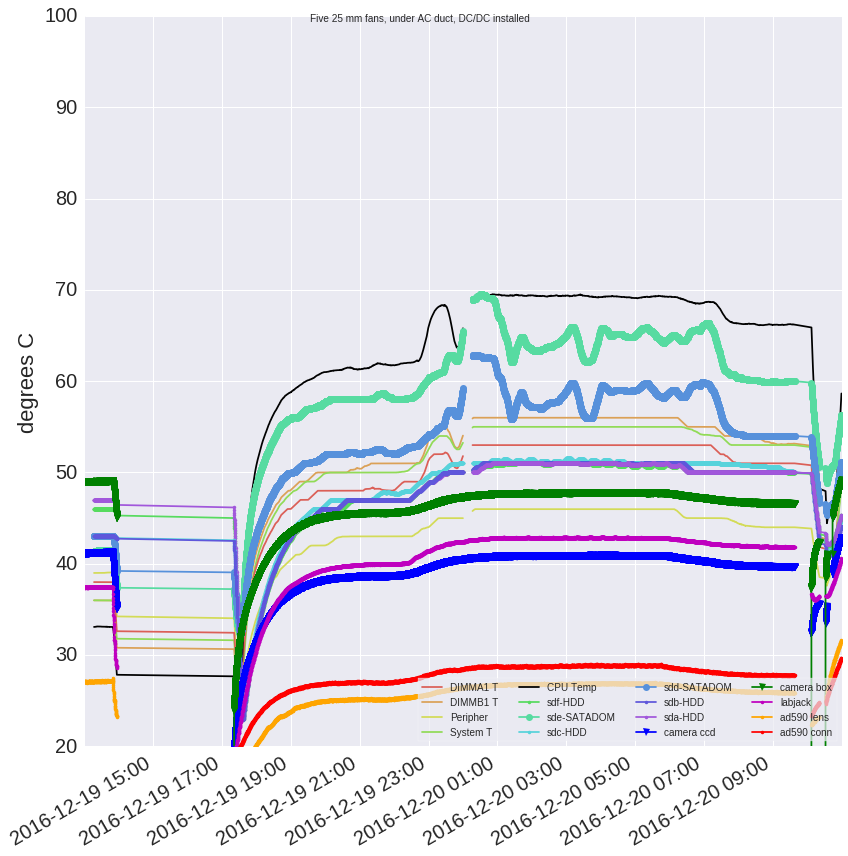

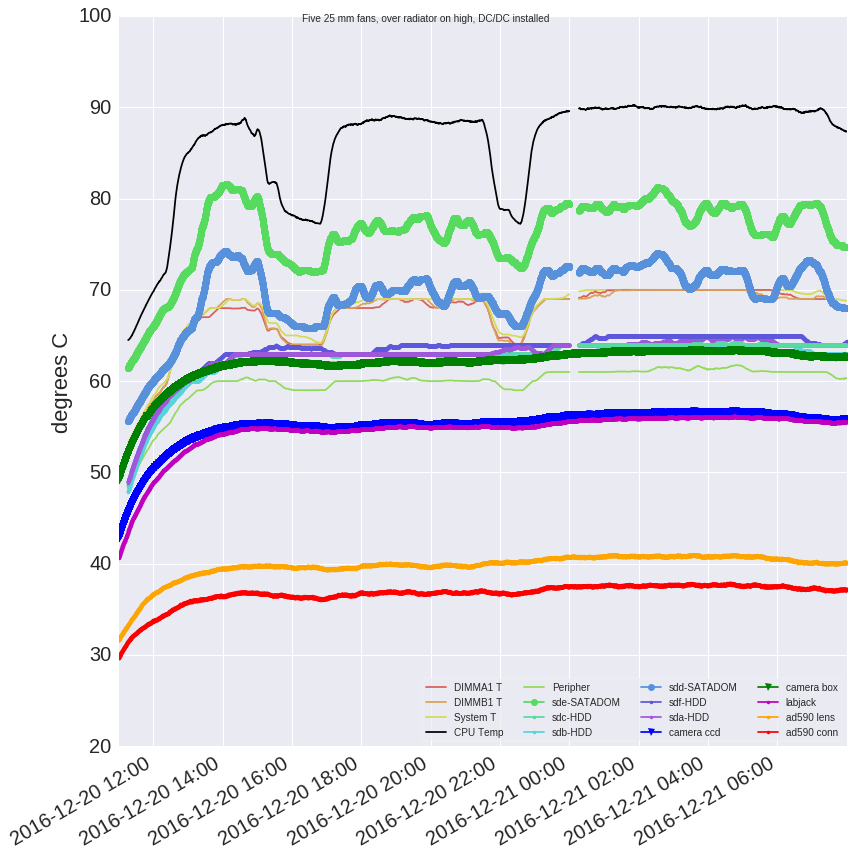

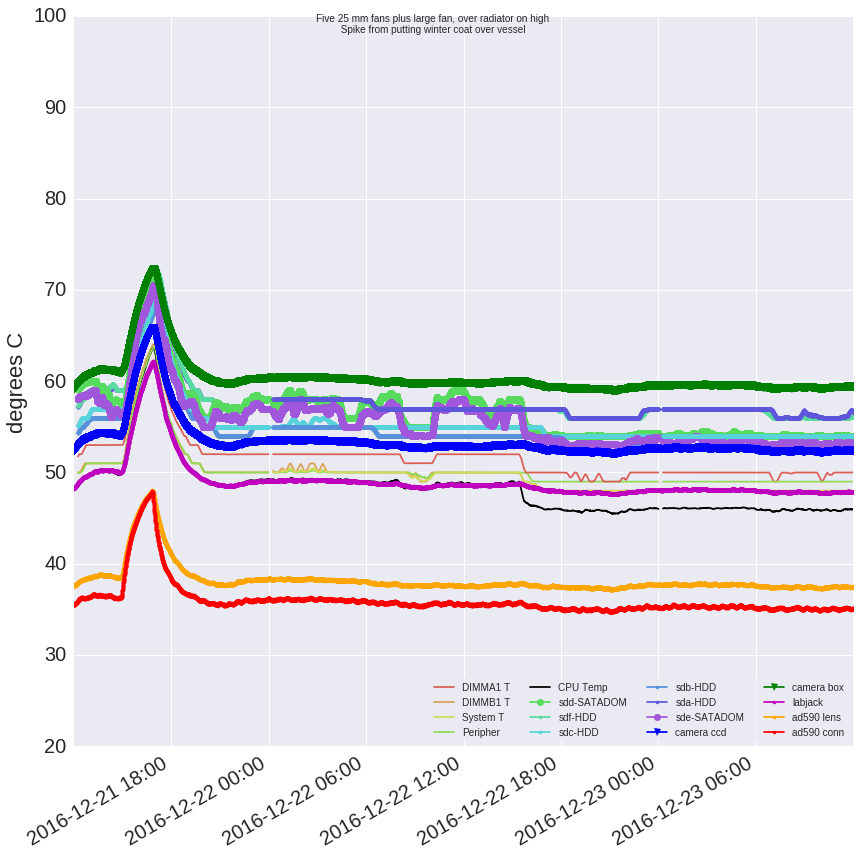

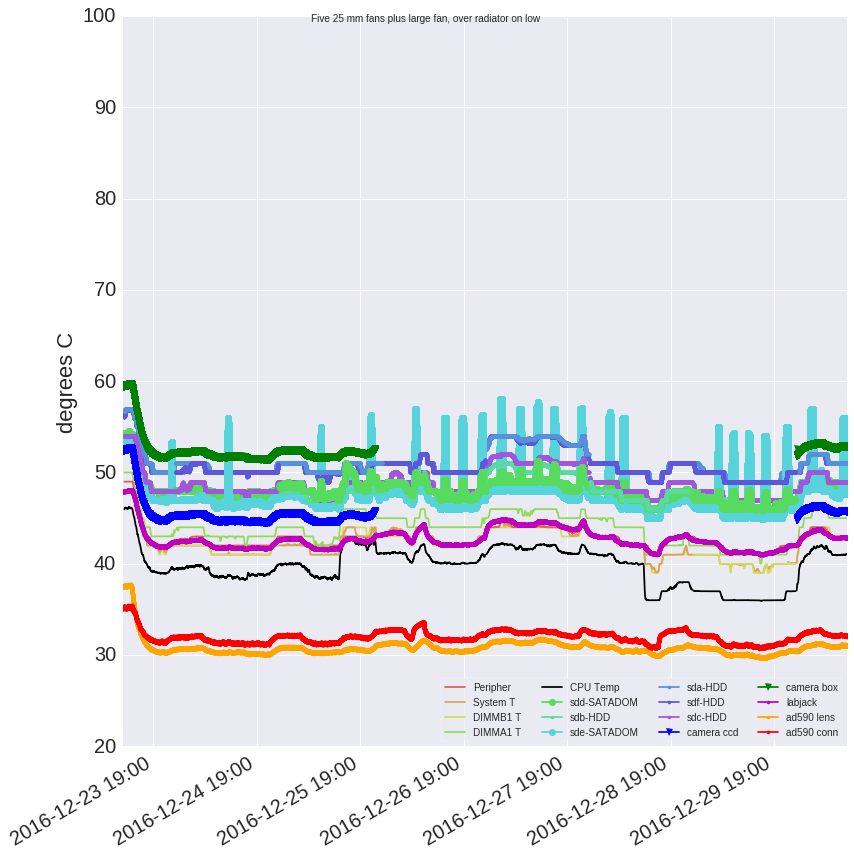

In [366]:
for start,end,description in experiments:
    start_ts = pd.Timestamp(start,tz=pytz.timezone('US/Eastern'))
    end_ts = pd.Timestamp(end,tz=pytz.timezone('US/Eastern'))
    fig,ax = plot_date_range(start_ts,end_ts,avgsamp=100)
    ax.set_ylim(20,100)
    fig.suptitle(description)
    filename = '_'.join([start,end,description]).replace(' ','_').replace(':','_').replace(',','_').replace('/','_') + '.png'
    fig.savefig(os.path.join('/home/gjones/pmc-thermal-testing',filename),bbox_inches='tight',rasterized=True)

In [327]:
ts = ?df.date[0]bz

In [331]:
ts.tz_localize('EST')

Timestamp('2016-12-21 15:11:22.117217-0500', tz='EST')

In [287]:
df['date'] = pd.to_datetime(df.epoch,unit='s')

(array([ 736320.,  736322.,  736324.,  736326.,  736328.,  736330.]),
 <a list of 6 Text xticklabel objects>)

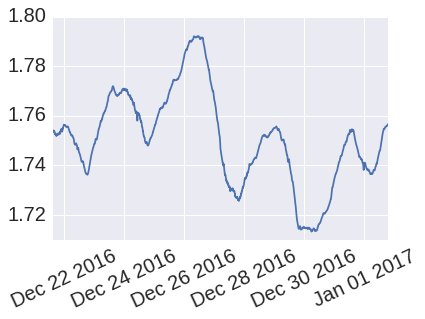

In [313]:
plot(df.date,df.ain4.rolling(100).mean())
plt.xticks(rotation=25)

(array([ 736320.,  736322.,  736324.,  736326.,  736328.,  736330.]),
 <a list of 6 Text xticklabel objects>)

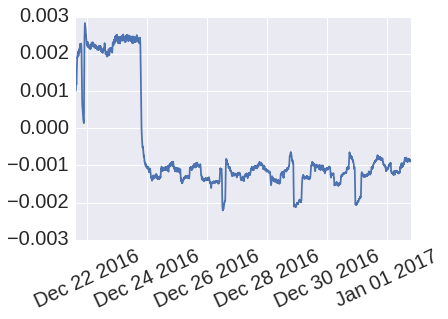

In [317]:
plot(df.date,df.ain6.rolling(100).mean()-df.ain5.rolling(100).mean())
plt.xticks(rotation=25)

(array([ 736328.20833333,  736328.45833333,  736328.70833333,
         736328.95833333,  736329.20833333,  736329.45833333,
         736329.70833333,  736329.95833333,  736330.20833333,
         736330.45833333,  736330.70833333]),
 <a list of 11 Text xticklabel objects>)

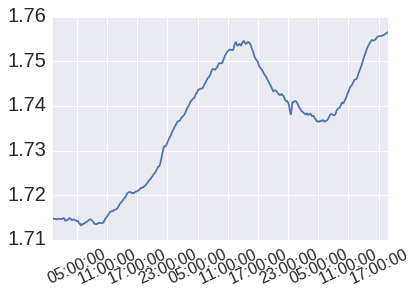

In [312]:
dd = df[df.date > '2016-12-30']
plot(dd.date,dd.ain4.rolling(100).mean())
plt.xticks(rotation=25,size=16)

In [320]:
df.date[:10]

0   2016-12-21 15:11:22.117217
1   2016-12-21 15:11:32.172694
2   2016-12-21 15:11:42.228859
3   2016-12-21 15:11:52.306270
4   2016-12-21 15:12:02.363829
5   2016-12-21 15:12:12.446906
6   2016-12-21 15:12:22.524965
7   2016-12-21 15:12:32.616484
8   2016-12-21 15:12:42.708388
9   2016-12-21 15:12:52.767709
Name: date, dtype: datetime64[ns]

In [188]:
cdict.items()

[('sdf-2016', (0.7871999999999999, 0.33999999999999997, 0.86)),
 ('sdd-2016', (0.47520000000000029, 0.33999999999999997, 0.86)),
 ('DIMMB1 T', (0.86, 0.68320000000000003, 0.33999999999999997)),
 ('DIMMA1 T', (0.41279999999999994, 0.86, 0.33999999999999997)),
 ('sdc-2016', (0.33999999999999997, 0.51679999999999948, 0.86)),
 ('sde-2016', (0.33999999999999997, 0.86, 0.57920000000000016)),
 ('sdb-2016', (0.86, 0.33999999999999997, 0.62079999999999991)),
 ('Peripher', (0.86, 0.37119999999999997, 0.33999999999999997)),
 ('sda-2016', (0.33999999999999997, 0.82879999999999987, 0.86)),
 ('System T', (0.72479999999999989, 0.86, 0.33999999999999997))]

In [98]:
df.columns

Index([u'epoch', u'value'], dtype='object')

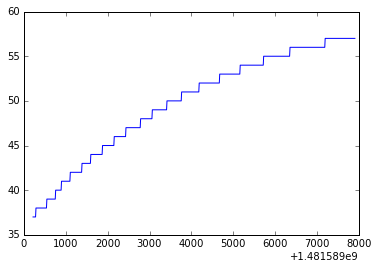

In [99]:
plot(df.epoch,df.value)

In [50]:
df = pd.read_csv('/home/pmcroot/c1/data1/2016-12-08_162359/index.csv')

In [51]:
df.shape

(33248, 13)

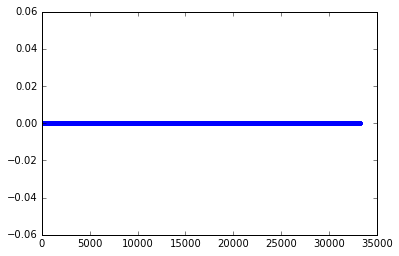

In [53]:
plot(df.exposure_us,'.')

In [57]:
print'\n'.join([('192.168.1.%d pmc-camera-ipmi-%d' % (k+40,k)) for k in range(8)])

192.168.1.40 pmc-camera-ipmi-0
192.168.1.41 pmc-camera-ipmi-1
192.168.1.42 pmc-camera-ipmi-2
192.168.1.43 pmc-camera-ipmi-3
192.168.1.44 pmc-camera-ipmi-4
192.168.1.45 pmc-camera-ipmi-5
192.168.1.46 pmc-camera-ipmi-6
192.168.1.47 pmc-camera-ipmi-7


In [188]:
cc = pd.read_csv('/home/pmcroot/c2/home/pmc/logs/housekeeping/charge_controller/pmc-charge-controller-0_2016-12-20_140910.csv',header=1,index_col='epoch')

In [189]:

cc.shape

(6778, 92)

In [145]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


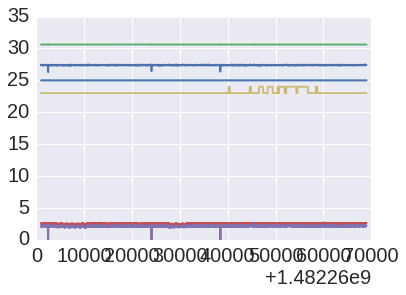

In [190]:
figure()
_=plot(cc.register_26*180*2**-15)
_=plot(cc.register_28*180*2**-15)
_=plot(cc.register_29*80*2**-15)
_=plot(cc.register_30*80*2**-15)
_=plot(cc.register_36)
_=plot(cc.register_37)
_=plot(cc.register_38)

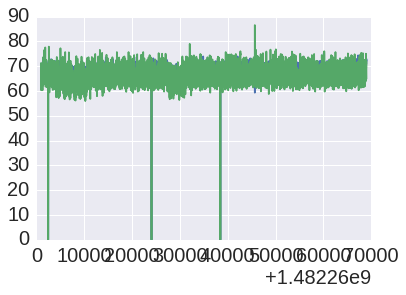

In [191]:
figure()
_=plot(cc.register_59*80*180*2**-17)
_=plot(cc.register_60*80*180*2**-17)
#_=plot(cc.register_28*180*2**-15)
#_=plot(cc.register_29*80*2**-15)
#_=plot(cc.register_30*80*2**-15)
#_=plot(cc.register_49)
#_=plot(cc.register_37)
#_=plot(cc.register_38)

In [178]:
hex(cc.register_49.iloc[0])

'0xa2L'

In [183]:
ee = pd.read_csv('/home/pmcroot/c2/home/pmc/logs/housekeeping/charge_controller/pmc-charge-controller-0_2016-12-20_140910__eeprom.csv',header=1)

In [184]:
ee

,epoch,eeprom_5403,eeprom_5404,eeprom_5405,eeprom_5406,eeprom_5407,eeprom_5408,eeprom_5409,eeprom_57344,eeprom_57345,...,eeprom_57540,eeprom_57541,eeprom_57542,eeprom_57543,eeprom_57544,eeprom_57545,eeprom_57546,eeprom_57547,eeprom_57548,eeprom_57549
0,1.482261e+09,80,502,0,162,0,0,0,2549,2458,...,90,16536,17655,43126,17256,17944,17662,33516,1,257
1,1.482265e+09,80,502,0,162,0,0,0,2549,2458,...,90,16536,17655,43126,17256,17944,17662,33516,1,257
2,1.482268e+09,80,502,0,162,0,0,0,2549,2458,...,90,16536,17655,43126,17256,17944,17662,33516,1,257
3,1.482272e+09,80,502,0,162,0,0,0,2549,2458,...,90,16536,17655,43126,17256,17944,17662,33516,1,257
4,1.482275e+09,80,502,0,162,0,0,0,2549,2458,...,90,16536,17655,43126,17256,17944,17662,33516,1,257
5,1.482279e+09,80,502,0,162,0,0,0,2549,2458,...,90,16536,17655,43126,17256,17944,17662,33516,1,257
6,1.482283e+09,80,502,0,162,0,0,0,2549,2458,...,90,16536,17655,43126,17256,17944,17662,33516,1,257
7,1.482286e+09,80,502,0,162,0,0,0,2549,2458,...,90,16536,17655,43126,17256,17944,17662,33516,1,257


In [185]:
ee.shape

(8, 120)